In [30]:
from PIL import Image  # pacote python para tratamento de imagens
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(482, 718)


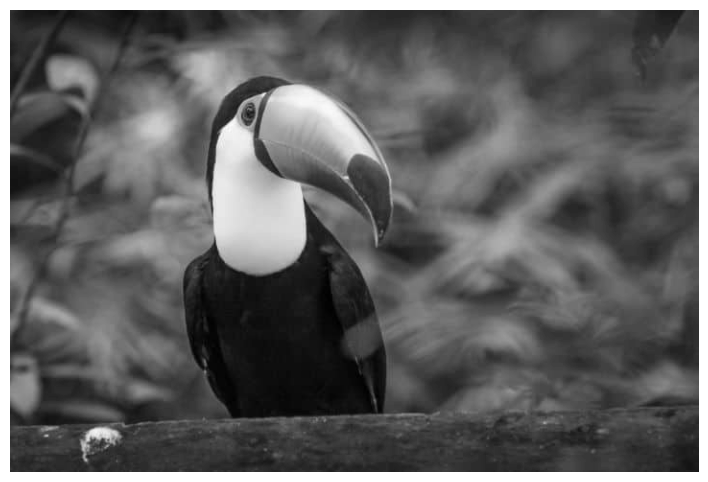

In [ ]:
# carregando a imagem e convertendo para tons de cinza + alpha
im = Image.open("image.png").convert('LA')

# transformando a imagem em uma matriz
X = np.asarray(im)[:,:,0]
print(X.shape)

plt.axis('off')
plt.imshow(X,cmap='gray')

In [32]:
print(X[100:110,100:110])

[[76 77 76 76 76 77 77 78 78 79]
 [76 76 76 75 76 77 77 78 78 79]
 [75 75 75 75 76 77 77 78 78 79]
 [75 75 75 74 76 77 77 78 78 79]
 [73 74 74 75 73 73 74 75 77 78]
 [72 72 73 73 72 73 74 75 76 78]
 [70 71 71 71 72 72 73 75 76 77]
 [69 69 69 69 71 72 73 74 75 77]
 [69 69 68 68 70 71 72 73 75 76]
 [70 69 69 68 70 70 71 73 74 75]]


In [34]:
def get_symmetrized_eigens(array):
    array = np.array(array, dtype=np.float64)
    a = np.dot(array.transpose(), array)
    return np.linalg.eigh(a)


# calculando SVD
# U,S,Vt = np.linalg.svd(X)

S2,V = get_symmetrized_eigens(X)

sorted_indices = np.argsort(S2)[::-1]
S2 = S2[sorted_indices]
V = V[:, sorted_indices]

print(S2)
S2[S2 < 0] = 0
S = np.sqrt(S2)



U = np.dot(X, V)  # Matriz U (deve ser normalizada)
U = U / [s if s!=0 else 1 for s in S]


Vt=V.T




[ 2.68654253e+09  1.86244754e+08  5.96626952e+07  4.10371352e+07
  2.94246311e+07  2.14522558e+07  1.41503534e+07  1.34967055e+07
  1.04950829e+07  8.03835842e+06  6.44428882e+06  4.75187443e+06
  4.64607257e+06  4.25980445e+06  3.69735123e+06  3.01402114e+06
  2.39139035e+06  1.93539691e+06  1.79485334e+06  1.70757615e+06
  1.45193756e+06  1.29000361e+06  1.05596882e+06  9.67688196e+05
  9.38409814e+05  9.25061515e+05  8.18408944e+05  7.52635388e+05
  6.60119747e+05  6.48197622e+05  5.86840331e+05  5.40872523e+05
  4.97906584e+05  4.62057088e+05  4.03875109e+05  3.54277057e+05
  3.52026677e+05  3.25975439e+05  2.86295581e+05  2.75476650e+05
  2.60554108e+05  2.48054770e+05  2.37560037e+05  2.20813937e+05
  2.13083680e+05  2.07916410e+05  1.97312599e+05  1.78736564e+05
  1.76946213e+05  1.71289530e+05  1.56802725e+05  1.50907494e+05
  1.37690028e+05  1.32904143e+05  1.29985049e+05  1.20561479e+05
  1.16838754e+05  1.07353520e+05  1.05771760e+05  1.03806611e+05
  9.53044682e+04  9.23752

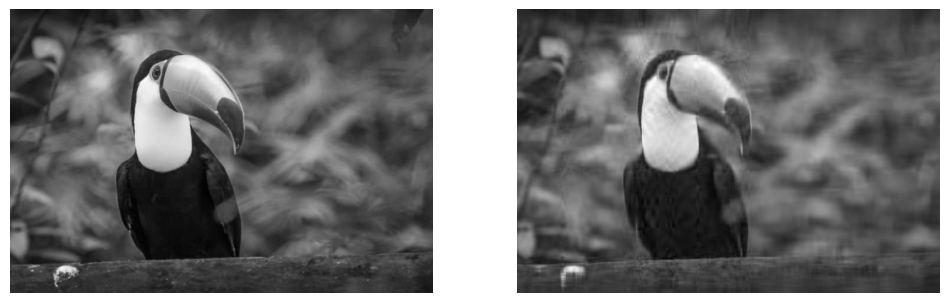

In [35]:
k =30
#Sk = np.diag(S[0:k])
#SkVt = np.dot(Sk,Vt[0:k,:])
# Xk = np.dot(U[:,0:k],SkVt)

Xk = np.linalg.multi_dot([U[:,0:k],np.diag(S[0:k]),Vt[0:k,:]])


plt.rcParams['figure.figsize'] = [12, 6]
f,(ax1,ax2) = plt.subplots(1,2)
ax1.axis('off')
ax1.imshow(X,cmap='gray')
ax2.axis('off')
ax2.imshow(Xk,cmap='gray')

In [36]:
# Calculando a porcentagem de compressão

#bits_original = X.shape[0]*X.shape[1]*16
bits_original = X.itemsize*X.shape[0]*X.shape[1]
print('Numero de bites original: ',bits_original)

bits_comprimido = X.itemsize*k*(X.shape[0]+X.shape[1])
print('Numero de bites comprimido: ',bits_comprimido)

print('Porcentagem de compressão: ', 100-bits_comprimido*100/bits_original)

Numero de bites original:  346076
Numero de bites comprimido:  36000
Porcentagem de compressão:  89.59766062945711
